# ASHRAE - Great Energy Predictor III
[Link to Competition](https://www.kaggle.com/competitions/ashrae-energy-prediction/overview)

## Data prep

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

data_dir = "drive/MyDrive/9417_team_folder/data/custom_data/"

data = pd.read_csv(data_dir + "categorical_train_set.csv", sep = ',')

In [5]:
print("Data shape:", data.shape)
print("Raw data columns:", data.columns)

Data shape: (20216100, 14)
Data columns: Index(['building_id', 'meter', 'timestamp', 'meter_reading', 'site_id',
       'primary_use', 'square_feet', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'],
      dtype='object')


In [13]:
def filter_by_meter_type(df_original, meter_type):
  assert type(meter_type) == int
  df = df_original.copy()
  df = df[df['meter'] == meter_type]
  df = df.drop(columns=['meter'])
  return df

def add_hour_column(df_original):
  df = df_original.copy()
  df['timestamp'] = pd.to_datetime(df['timestamp'])
  df['hour'] = df.timestamp.dt.hour
  return df

def convert_timestamp_to_numerical(df_original):
  df = df_original.copy()
  df.timestamp = pd.to_datetime(df.timestamp)
  time_start = np.datetime64('2016-01-01 00:00:00')
  df['timestamp'] = (df['timestamp'] - time_start) / np.timedelta64(3600, 's') 
  return df

def convert_primary_use_to_int(df_original):
  df = df_original.copy()
  df.primary_use = pd.Categorical(data.primary_use)
  df.primary_use = df.primary_use.cat.codes
  return df

In [14]:
data = filter_by_meter_type(data, meter_type=0)
data = add_hour_column(data)
data = convert_timestamp_to_numerical(data)
data = convert_primary_use_to_int(data)

In [15]:
# Now we take only the columns that we want for the features and target
desired_columns = ['timestamp', 'square_feet',
                   'primary_use',
                   'air_temperature', 'cloud_coverage', 'dew_temperature',
                   'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
                   'wind_speed', 'hour', 'meter_reading']
data = data[desired_columns]
print("Now we have these final columns:", list(data.columns))

Now we have these final columns: ['timestamp', 'square_feet', 'primary_use', 'air_temperature', 'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction', 'wind_speed', 'hour', 'meter_reading']


## Select target and feature columns

In [19]:
from sklearn.model_selection import train_test_split

target_column = ['meter_reading']
feature_columns = ['timestamp', 'square_feet',
                   'primary_use',
                   'air_temperature', 'cloud_coverage', 'dew_temperature',
                   'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
                   'wind_speed', 'hour']

data = data.dropna()
X_pandas = data[feature_columns]
y_pandas = data[target_column]

# Convert to np
X = np.array(X_pandas.values, dtype=np.float32)
y = np.array(y_pandas.values, dtype=np.float32)

## Train test split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Fitting the model

In [33]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=30)
reg = model.fit(X_train, y_train)

## Evaluation

In [34]:
from sklearn.metrics import mean_squared_log_error

y_pred = reg.predict(X_test)
MSLE = mean_squared_log_error(y_test, y_pred)
accuracy = reg.score(X_test, y_test)

print('MSLE', MSLE)
print('Accuracy', accuracy)

MSLE 0.10692366167863825
Accuracy 0.9436781895221427


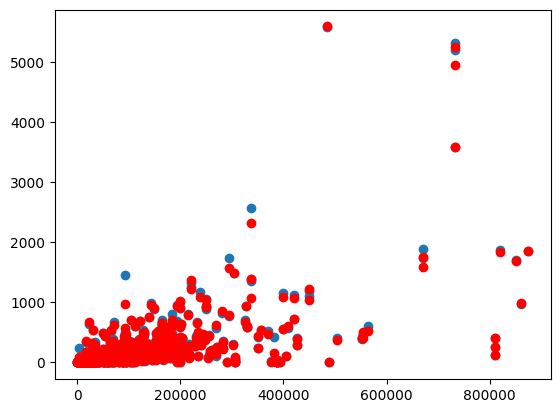

In [31]:
import matplotlib.pyplot as plt

size = 1000

temperature = X_test[:size,8]
square_feet = X_test[:size,1]

feature = square_feet

xx = np.linspace(0, max(feature))
plt.scatter(feature.flatten(), y_test[:size])
plt.scatter(feature.flatten(), reg.predict(X_test[:size]), color='red')

plt.show()
